In [3]:
pip install pandas
pip install matplotlib
pip install seaborn
pip install numpy


SyntaxError: invalid syntax (2477227511.py, line 1)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('/Users/manish/Downloads/Customer Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
#Replacing blanks with = as tenure is 0 and no total charges are recorder
#Also changed the data type of total charges to float
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")
df.info()

df.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


0

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
#Now we checked for duplicate data
df["customerID"].duplicated().sum()

0

In [20]:
#We have converted 0 and 1 value of senior citizen to yes/no to make it easy to understand
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [22]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


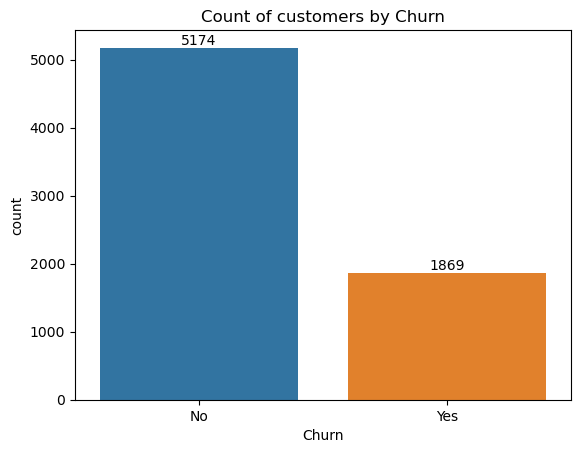

In [42]:
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0]) #to view data in count
plt.title("Count of customers by Churn")
plt.show()

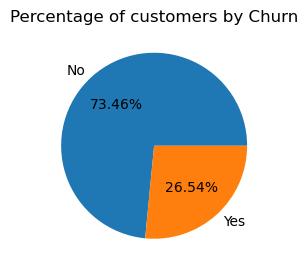

,Churn
Churn,
No,5174
Yes,1869


In [44]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn' : "count"})
plt.pie(gb["Churn"],labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of customers by Churn")
plt.show()
gb

In [45]:
#from the given pie chart we can see that 26.54% of our customer churtned out
#Lets found out why?


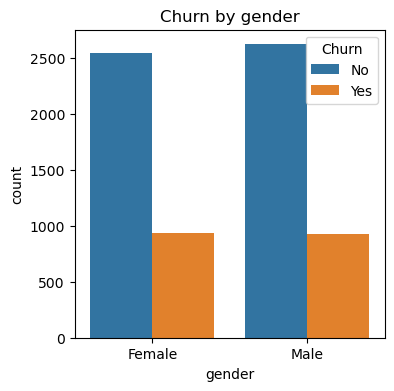

In [56]:
#Lets explore by gender
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by gender")
plt.show()


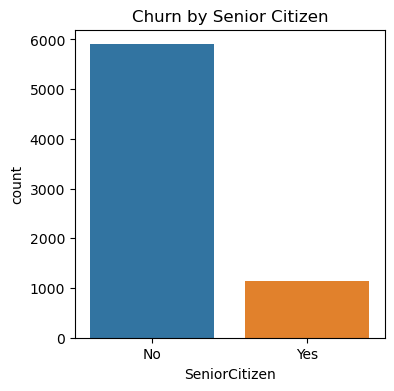

In [72]:
#from above table 
#Lets explore by Senior Citizen
plt.figure(figsize = (4,4))
sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Churn by Senior Citizen")
plt.show()

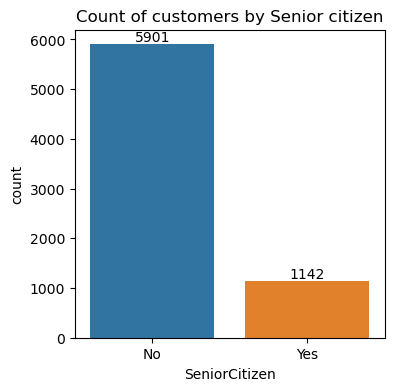

In [62]:
#Used 
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'SeniorCitizen', data = df)
ax.bar_label(ax.containers[0]) #to view data in count
plt.title("Count of customers by Senior citizen")
plt.show()

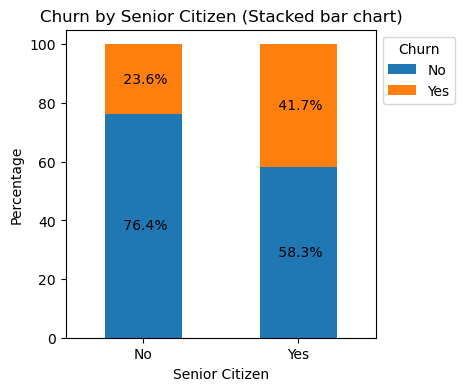

In [74]:
#Staceked bar chat

total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize = True).unstack()*100

#plot
fig, ax = plt.subplots(figsize = (4,4)) #Adjust fig sixe

#plot the bars
total_counts.plot(kind='bar', stacked = True, ax=ax, color=['#1f77b4','#ff7f0e'])

#Add percentage lables on the bars
for p in ax.patches:
    width,height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.text(x + width /2, y + height/2, f'{height: .1f}%', ha = 'center', va = 'center')

plt.title('Churn by Senior Citizen (Stacked bar chart)')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Churn',bbox_to_anchor = (1,1) )
plt.show()

#Comparative a greater percentage of perople in senior citizen category gets churned

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


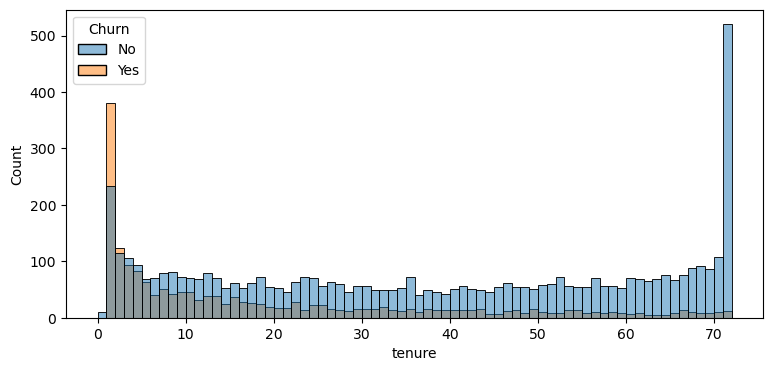

In [79]:
#Lets move ahead with Tenure
plt.figure(figsize = (9,4))
sns.histplot(x="tenure", data = df, bins = 72, hue = "Churn")
plt.show()

#People who have used servies for long time have stayed and people who has used in initial days churned out

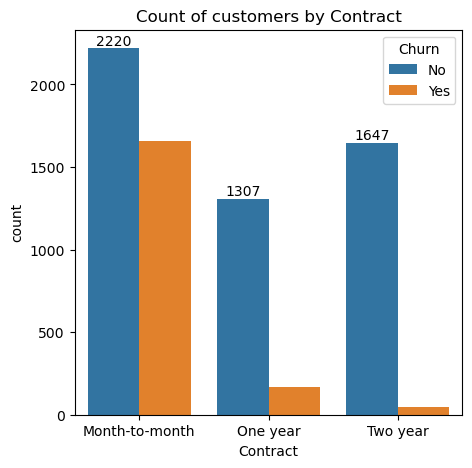

In [82]:
#Lets move ahead with count by contract
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'Contract', data = df, hue = "Churn")
ax.bar_label(ax.containers[0]) #to view data in count
plt.title("Count of customers by Contract")
plt.show()

in this data we can see that persons who used mont to month plan churned out earl while 2 years won't churn reguearly
People who have month to month contract are likely to churn

In [84]:
#To see all the values
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

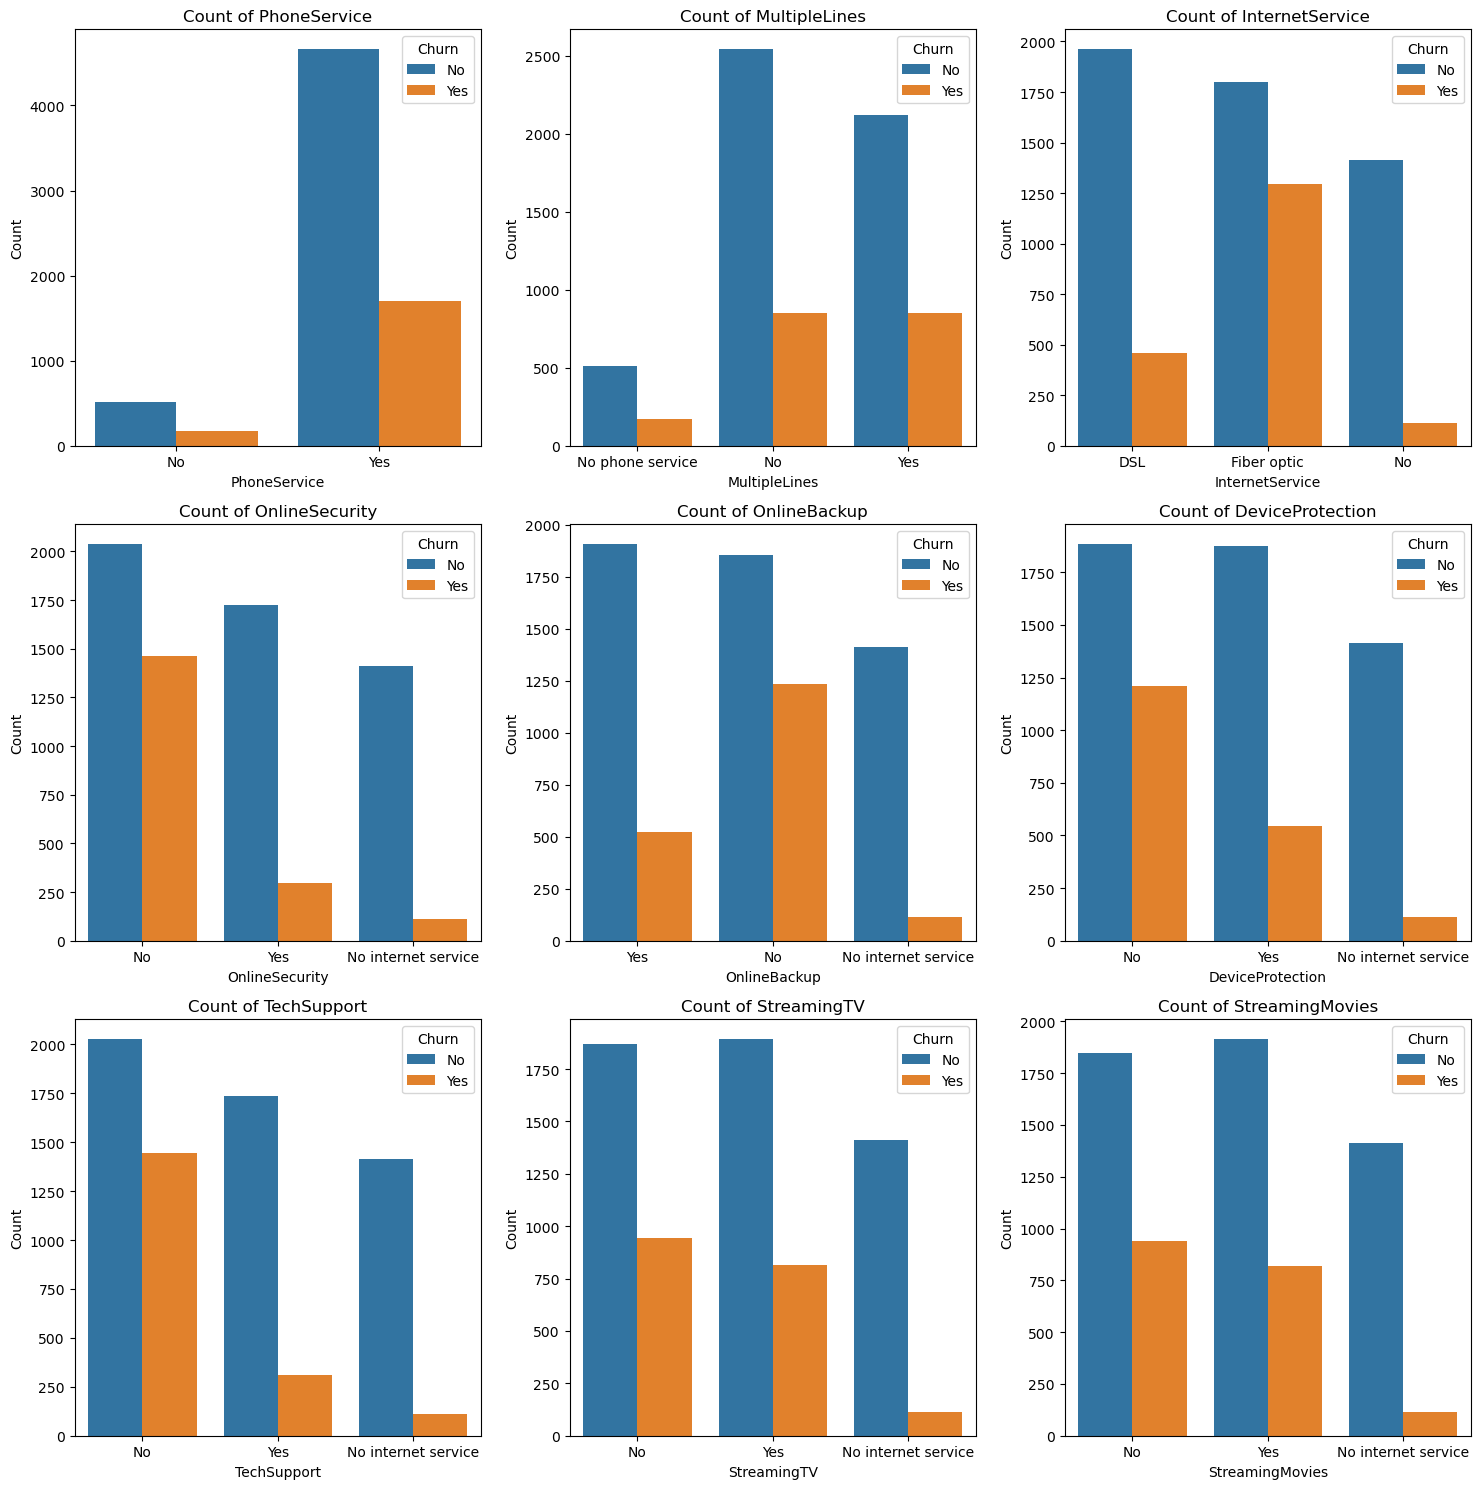

In [90]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplot grid
num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(columns) + num_cols - 1) // num_cols  # Calculate number of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Loop through the columns and create count plots
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i], hue="Churn")
    axes[i].set_title(f'Count of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


# Adjust layout
plt.tight_layout()
plt.show()

The majority of customer who do not churn tend to have services like Phone Service, Internet Service, and onlinesecuroty enables for services like onlinebackups, Tech Support, and Streaming TV, churn rates are noticeably higher when these services are not used or are unavailable

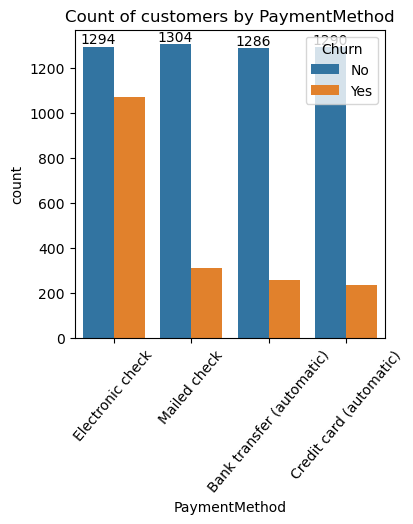

In [98]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = "Churn")
ax.bar_label(ax.containers[0]) #to view data in count
plt.title("Count of customers by PaymentMethod")
plt.xticks(rotation = 50)
plt.show()

In [ ]:
#Credit card payment has lesser chunk